### Set path to original pyNeuroChem. Please change to your own path

#### Import required libraries

In [4]:
import sys
#sys.path.append('/home/olexandr/notebooks/ASE_ANI/lib')
from ase_interface import ANIENS
from ase_interface import aniensloader
from ase_interface import ANIENS,ensemblemolecule

van Der Waals correction will be unavailable. Please install ased3


In [5]:
import numpy as np
import  ase
import time
#from ase.build import molecule
#from ase.neb import NEB
#from ase.calculators.mopac import MOPAC
from ase.md.langevin import Langevin
from ase.io.trajectory import Trajectory
from ase import units

from ase.optimize.fire import FIRE as QuasiNewton

from ase.md.nvtberendsen import NVTBerendsen
from ase.md.verlet import VelocityVerlet
from ase.md import MDLogger

#from ase.neb import NEBtools
from ase.io import read, write
from ase.optimize import BFGS, LBFGS 

#0.0252235

#### Load the benzene molecule from the xyz

In [6]:
bz = read('/home/jujuman/Gits/ASE_ANI/examples/data/bz.xyz')

#### Set ANI ensemble calculator

In [7]:
# Current ANI model options are:
# '../ani_models/ani-1ccx_8x.info' Coupled cluster transfer learned model
# '../ani_models/ani-1x_8x.info'   Full ANI-1x wb97x/6-31g* dataset model
bz.set_calculator(ANIENS(aniensloader('../ani_models/ani-1ccx_8x.info',0,multigpu=False)))

In [8]:
Fn = bz.calc.calculate_numerical_forces(bz, d=0.001)

In [9]:
bz.get_potential_energy()
Fa = bz.get_forces()

In [10]:
np.mean(np.abs(Fn-Fa))

0.0003670425097867039

In [8]:
np.mean(np.sum(Fa,axis=0))

-1.9308144114105197e-07

In [9]:
np.mean(np.sum(Fn,axis=0))

-9.31540853343904e-05

In [10]:
Fa

array([[ 0.07516748,  1.373267  , -0.92306109],
       [-0.3811568 ,  1.46746388,  0.66606953],
       [ 0.45629908, -0.09497067, -1.58899369],
       [ 0.38124348, -1.46771682, -0.66622905],
       [-0.07515149, -1.3730769 ,  0.92288081],
       [-0.45630507,  0.0949781 ,  1.58899718],
       [-0.15415035, -2.81436188,  1.89231355],
       [ 0.78127912, -3.00825441, -1.36530617],
       [-0.93536688,  0.19401158,  3.25736398],
       [-0.78135736,  3.00853657,  1.36546569],
       [ 0.1541309 ,  2.81413516, -1.89213662],
       [ 0.93536787, -0.19401235, -3.25736391]])

In [11]:
Fn

array([[ 0.07386589,  1.37349112, -0.92216574],
       [-0.38030873,  1.46781326,  0.6666057 ],
       [ 0.45724192, -0.0953141 , -1.58857584],
       [ 0.38049642, -1.46787819, -0.66668   ],
       [-0.07487395, -1.37267383,  0.92198453],
       [-0.45697582,  0.09547249,  1.58853544],
       [-0.15439396, -2.81450165,  1.89218081],
       [ 0.78125627, -3.00841141, -1.36542171],
       [-0.93571404,  0.19406465,  3.25737405],
       [-0.78115956,  3.00844785,  1.36556857],
       [ 0.15401837,  2.81392935, -1.8916944 ],
       [ 0.93564048, -0.19413622, -3.25738751]])

In [12]:
-0.21560924*2

-0.43121848

#### Helper functions

In [13]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    return np.arccos(np.clip(np.dot(unit_vector(v1), unit_vector(v2)), -1.0, 1.0))

#### Run Optimization

In [14]:
# X = bz.get_positions()
# eqdist = np.linalg.norm(X[0]-X[1])
# eqenrg = bz.get_potential_energy()
# eqangl = angle_between(X[0]-X[1],X[0]-X[2])
# print('Distances: ',np.array([np.linalg.norm(X[0]-X[1]),
#                     np.linalg.norm(X[0]-X[2]),
#                     np.linalg.norm(X[0]-X[3]),
#                     np.linalg.norm(X[0]-X[4])]))
# print('Angles: ',np.array([57.2958*angle_between(X[0]-X[1],X[0]-X[2]),
#                  57.2958*angle_between(X[0]-X[1],X[0]-X[3]),
#                  57.2958*angle_between(X[0]-X[1],X[0]-X[4]),
#                  57.2958*angle_between(X[0]-X[2],X[0]-X[3]),
#                  57.2958*angle_between(X[0]-X[2],X[0]-X[4]),
#                  57.2958*angle_between(X[0]-X[3],X[0]-X[4])]))

# start_time = time.time()
# dyn = LBFGS(bz)
# dyn.run(fmax=0.001)
# print('[ANI Total time:', time.time() - start_time, 'seconds]')

# X = bz.get_positions()
# eqdist = np.linalg.norm(X[0]-X[1])
# eqenrg = bz.get_potential_energy()
# eqangl = angle_between(X[0]-X[1],X[0]-X[2])
# print('Distances: ',np.array([np.linalg.norm(X[0]-X[1]),
#                     np.linalg.norm(X[0]-X[2]),
#                     np.linalg.norm(X[0]-X[3]),
#                     np.linalg.norm(X[0]-X[4])]))
# print('Angles: ',np.array([57.2958*angle_between(X[0]-X[1],X[0]-X[2]),
#                  57.2958*angle_between(X[0]-X[1],X[0]-X[3]),
#                  57.2958*angle_between(X[0]-X[1],X[0]-X[4]),
#                  57.2958*angle_between(X[0]-X[2],X[0]-X[3]),
#                  57.2958*angle_between(X[0]-X[2],X[0]-X[4]),
#                  57.2958*angle_between(X[0]-X[3],X[0]-X[4])]))

#### Setup dynamics

In [15]:
# Temperature
T = 300.0

# Time step
dt = 1.0

# We want to run MD with constant energy using the Langevin algorithm
# with a time step of 5 fs, the temperature T and the friction
# coefficient to 0.02 atomic units.
#dyn = Langevin(bz, dt * units.fs, T * units.kB, 0.01)
dyn = VelocityVerlet(bz, dt=0.5 * units.fs)

#### Setup printer function

In [16]:
CHdist = []
CHHang = []
energy = []
temper = []
toteng = []

def printenergy(a=bz,b=dyn,c=CHdist,d=CHHang,e=energy,t=temper,et=toteng):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Step: %i Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.7feV' % (dyn.get_number_of_steps(),epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
    
    X = a.get_positions()
    
    c.append([dt*dyn.get_number_of_steps(),np.linalg.norm(X[0]-X[1]),np.linalg.norm(X[0]-X[2]),np.linalg.norm(X[0]-X[3]),np.linalg.norm(X[0]-X[4])])
    d.append([dt*dyn.get_number_of_steps(),angle_between(X[0]-X[1],X[0]-X[2]),angle_between(X[0]-X[1],X[0]-X[3]),angle_between(X[0]-X[1],X[0]-X[4]),angle_between(X[0]-X[2],X[0]-X[3]),angle_between(X[0]-X[2],X[0]-X[4]),angle_between(X[0]-X[3],X[0]-X[4])])
    e.append([dt*dyn.get_number_of_steps(),a.get_potential_energy()])
    t.append([dt*dyn.get_number_of_steps(),ekin / (1.5 * units.kB)])
    et.append([dt*dyn.get_number_of_steps(),epot + ekin])
    
    
dyn.attach(printenergy, interval=25)
printenergy()

Step: 0 Energy per atom: Epot = -525.248eV  Ekin = 0.000eV (T=  0K)  Etot = -525.2481699eV


#### Run 2000 steps of MD

In [17]:
start_time = time.time()
dyn.run(2000) # Do 1ps of MD
print('[ANI Total time:', time.time() - start_time, 'seconds]')

CHdist = np.vstack(CHdist)
CHHang = np.vstack(CHHang)
temper = np.vstack(temper)
energy = np.vstack(energy)
toteng = np.vstack(toteng)

Step: 25 Energy per atom: Epot = -525.301eV  Ekin = 0.052eV (T=400K)  Etot = -525.2493612eV
Step: 50 Energy per atom: Epot = -525.315eV  Ekin = 0.066eV (T=508K)  Etot = -525.2495042eV
Step: 75 Energy per atom: Epot = -525.261eV  Ekin = 0.012eV (T= 95K)  Etot = -525.2486837eV
Step: 100 Energy per atom: Epot = -525.261eV  Ekin = 0.012eV (T= 94K)  Etot = -525.2488477eV
Step: 125 Energy per atom: Epot = -525.315eV  Ekin = 0.065eV (T=504K)  Etot = -525.2494673eV
Step: 150 Energy per atom: Epot = -525.295eV  Ekin = 0.046eV (T=355K)  Etot = -525.2492560eV
Step: 175 Energy per atom: Epot = -525.253eV  Ekin = 0.005eV (T= 38K)  Etot = -525.2483776eV
Step: 200 Energy per atom: Epot = -525.303eV  Ekin = 0.054eV (T=417K)  Etot = -525.2495158eV
Step: 225 Energy per atom: Epot = -525.299eV  Ekin = 0.050eV (T=389K)  Etot = -525.2490357eV
Step: 250 Energy per atom: Epot = -525.264eV  Ekin = 0.015eV (T=114K)  Etot = -525.2488092eV
Step: 275 Energy per atom: Epot = -525.270eV  Ekin = 0.021eV (T=160K)  Et

In [18]:
import matplotlib.pyplot as plt

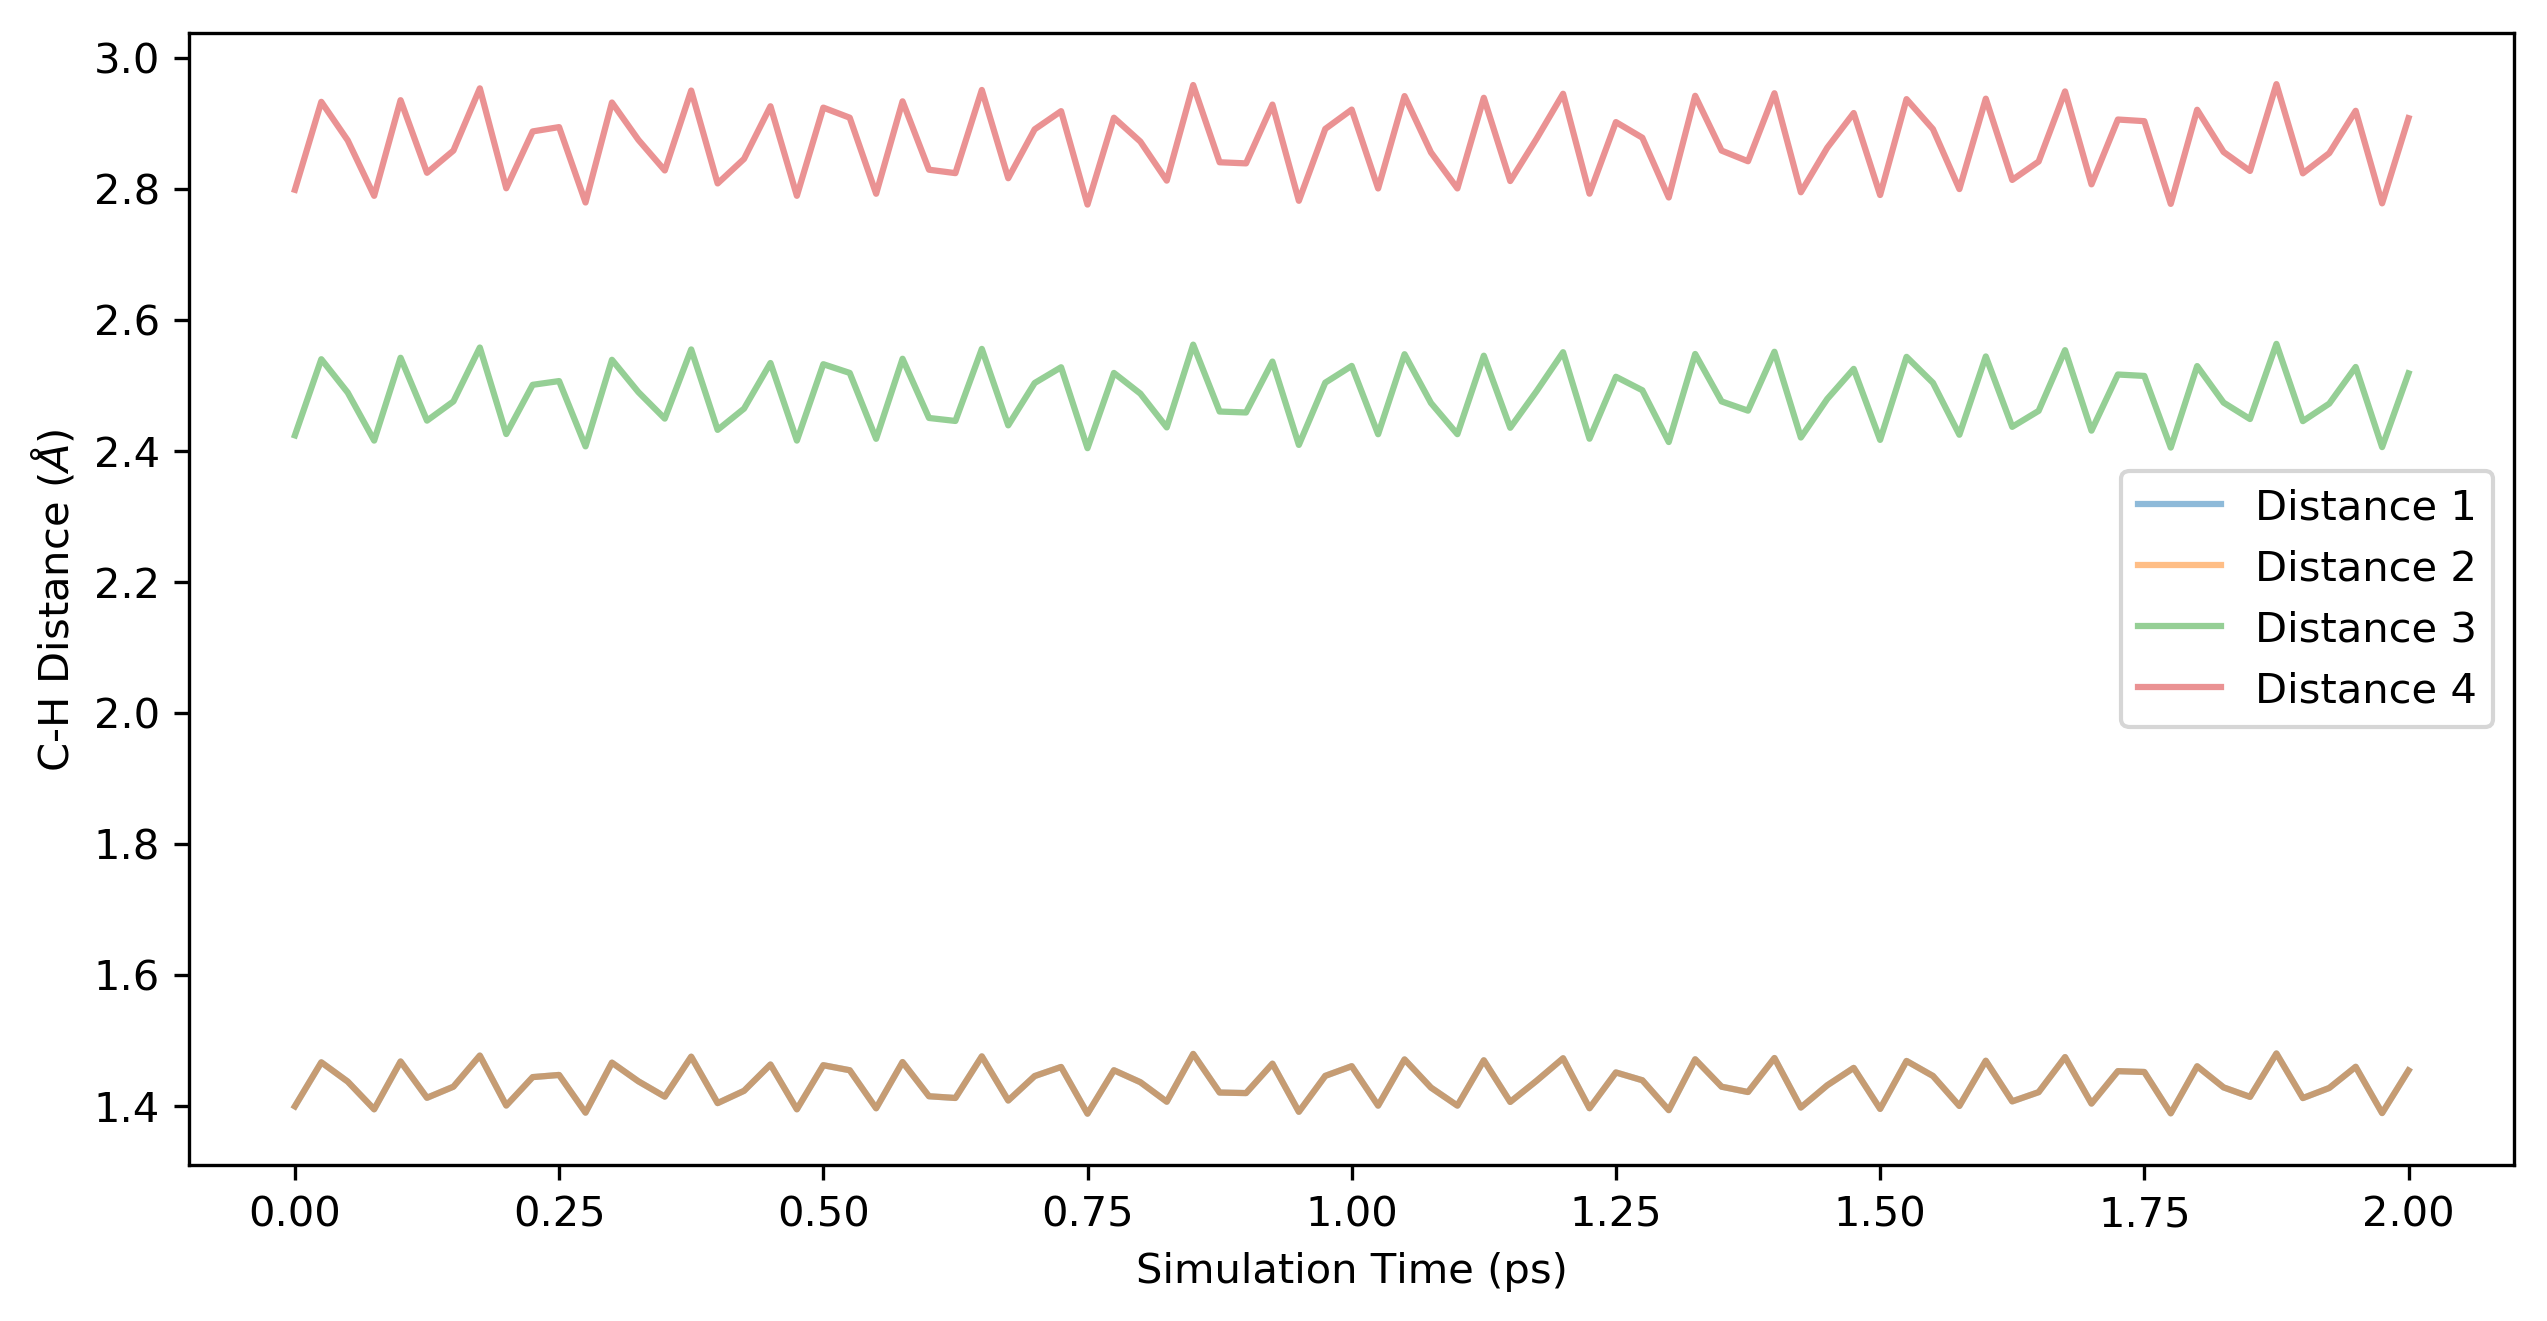

In [19]:
fig = plt.figure(figsize=(10,5),dpi=300)
plt.plot(CHdist[:,0]/1000,CHdist[:,1],label="Distance 1",alpha=0.5)
plt.plot(CHdist[:,0]/1000,CHdist[:,2],label="Distance 2",alpha=0.5)
plt.plot(CHdist[:,0]/1000,CHdist[:,3],label="Distance 3",alpha=0.5)
plt.plot(CHdist[:,0]/1000,CHdist[:,4],label="Distance 4",alpha=0.5)
#plt.hlines(eqdist,0,(CHdist[:,0]/1000).max(),linestyle='--',zorder=100)

plt.legend()

plt.xlabel("Simulation Time (ps)")
plt.ylabel(r"C-H Distance ($\AA$)")
plt.show()

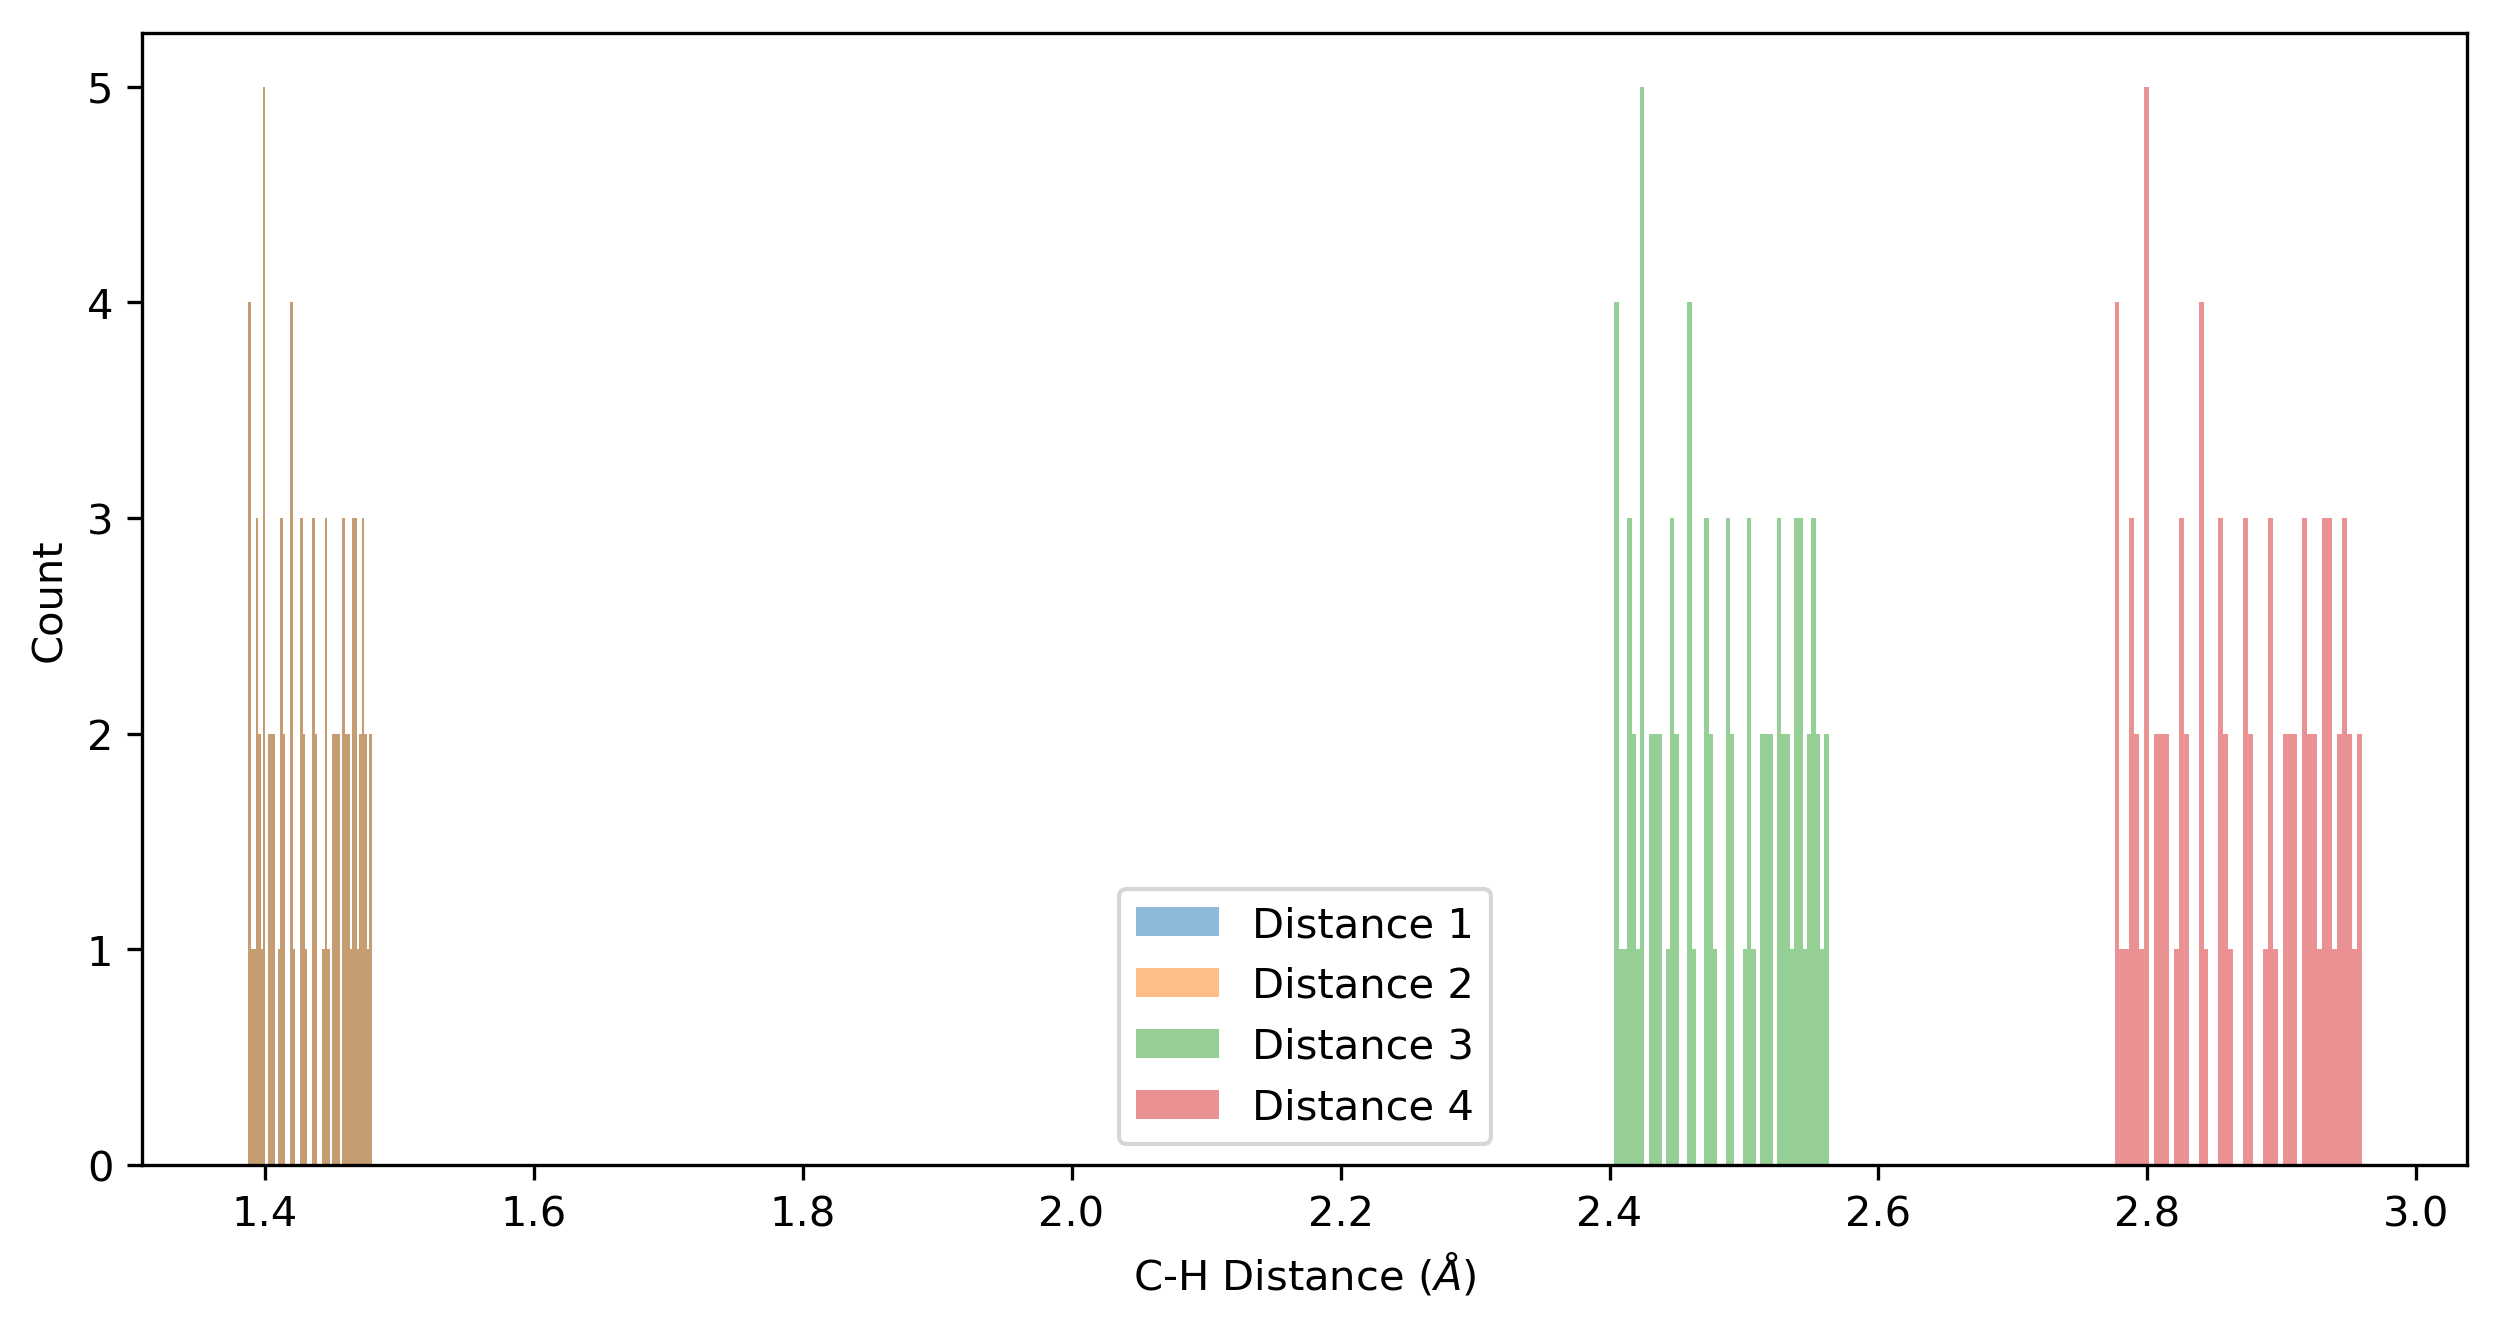

In [20]:
fig = plt.figure(figsize=(10,5),dpi=300)
plt.hist(CHdist[:,1],bins=50,label="Distance 1",alpha=0.5)
plt.hist(CHdist[:,2],bins=50,label="Distance 2",alpha=0.5)
plt.hist(CHdist[:,3],bins=50,label="Distance 3",alpha=0.5)
plt.hist(CHdist[:,4],bins=50,label="Distance 4",alpha=0.5)
#plt.vlines(eqdist,0,700,linestyle='--',zorder=100)

plt.legend()

plt.ylabel("Count")
plt.xlabel(r"C-H Distance ($\AA$)")
plt.show()

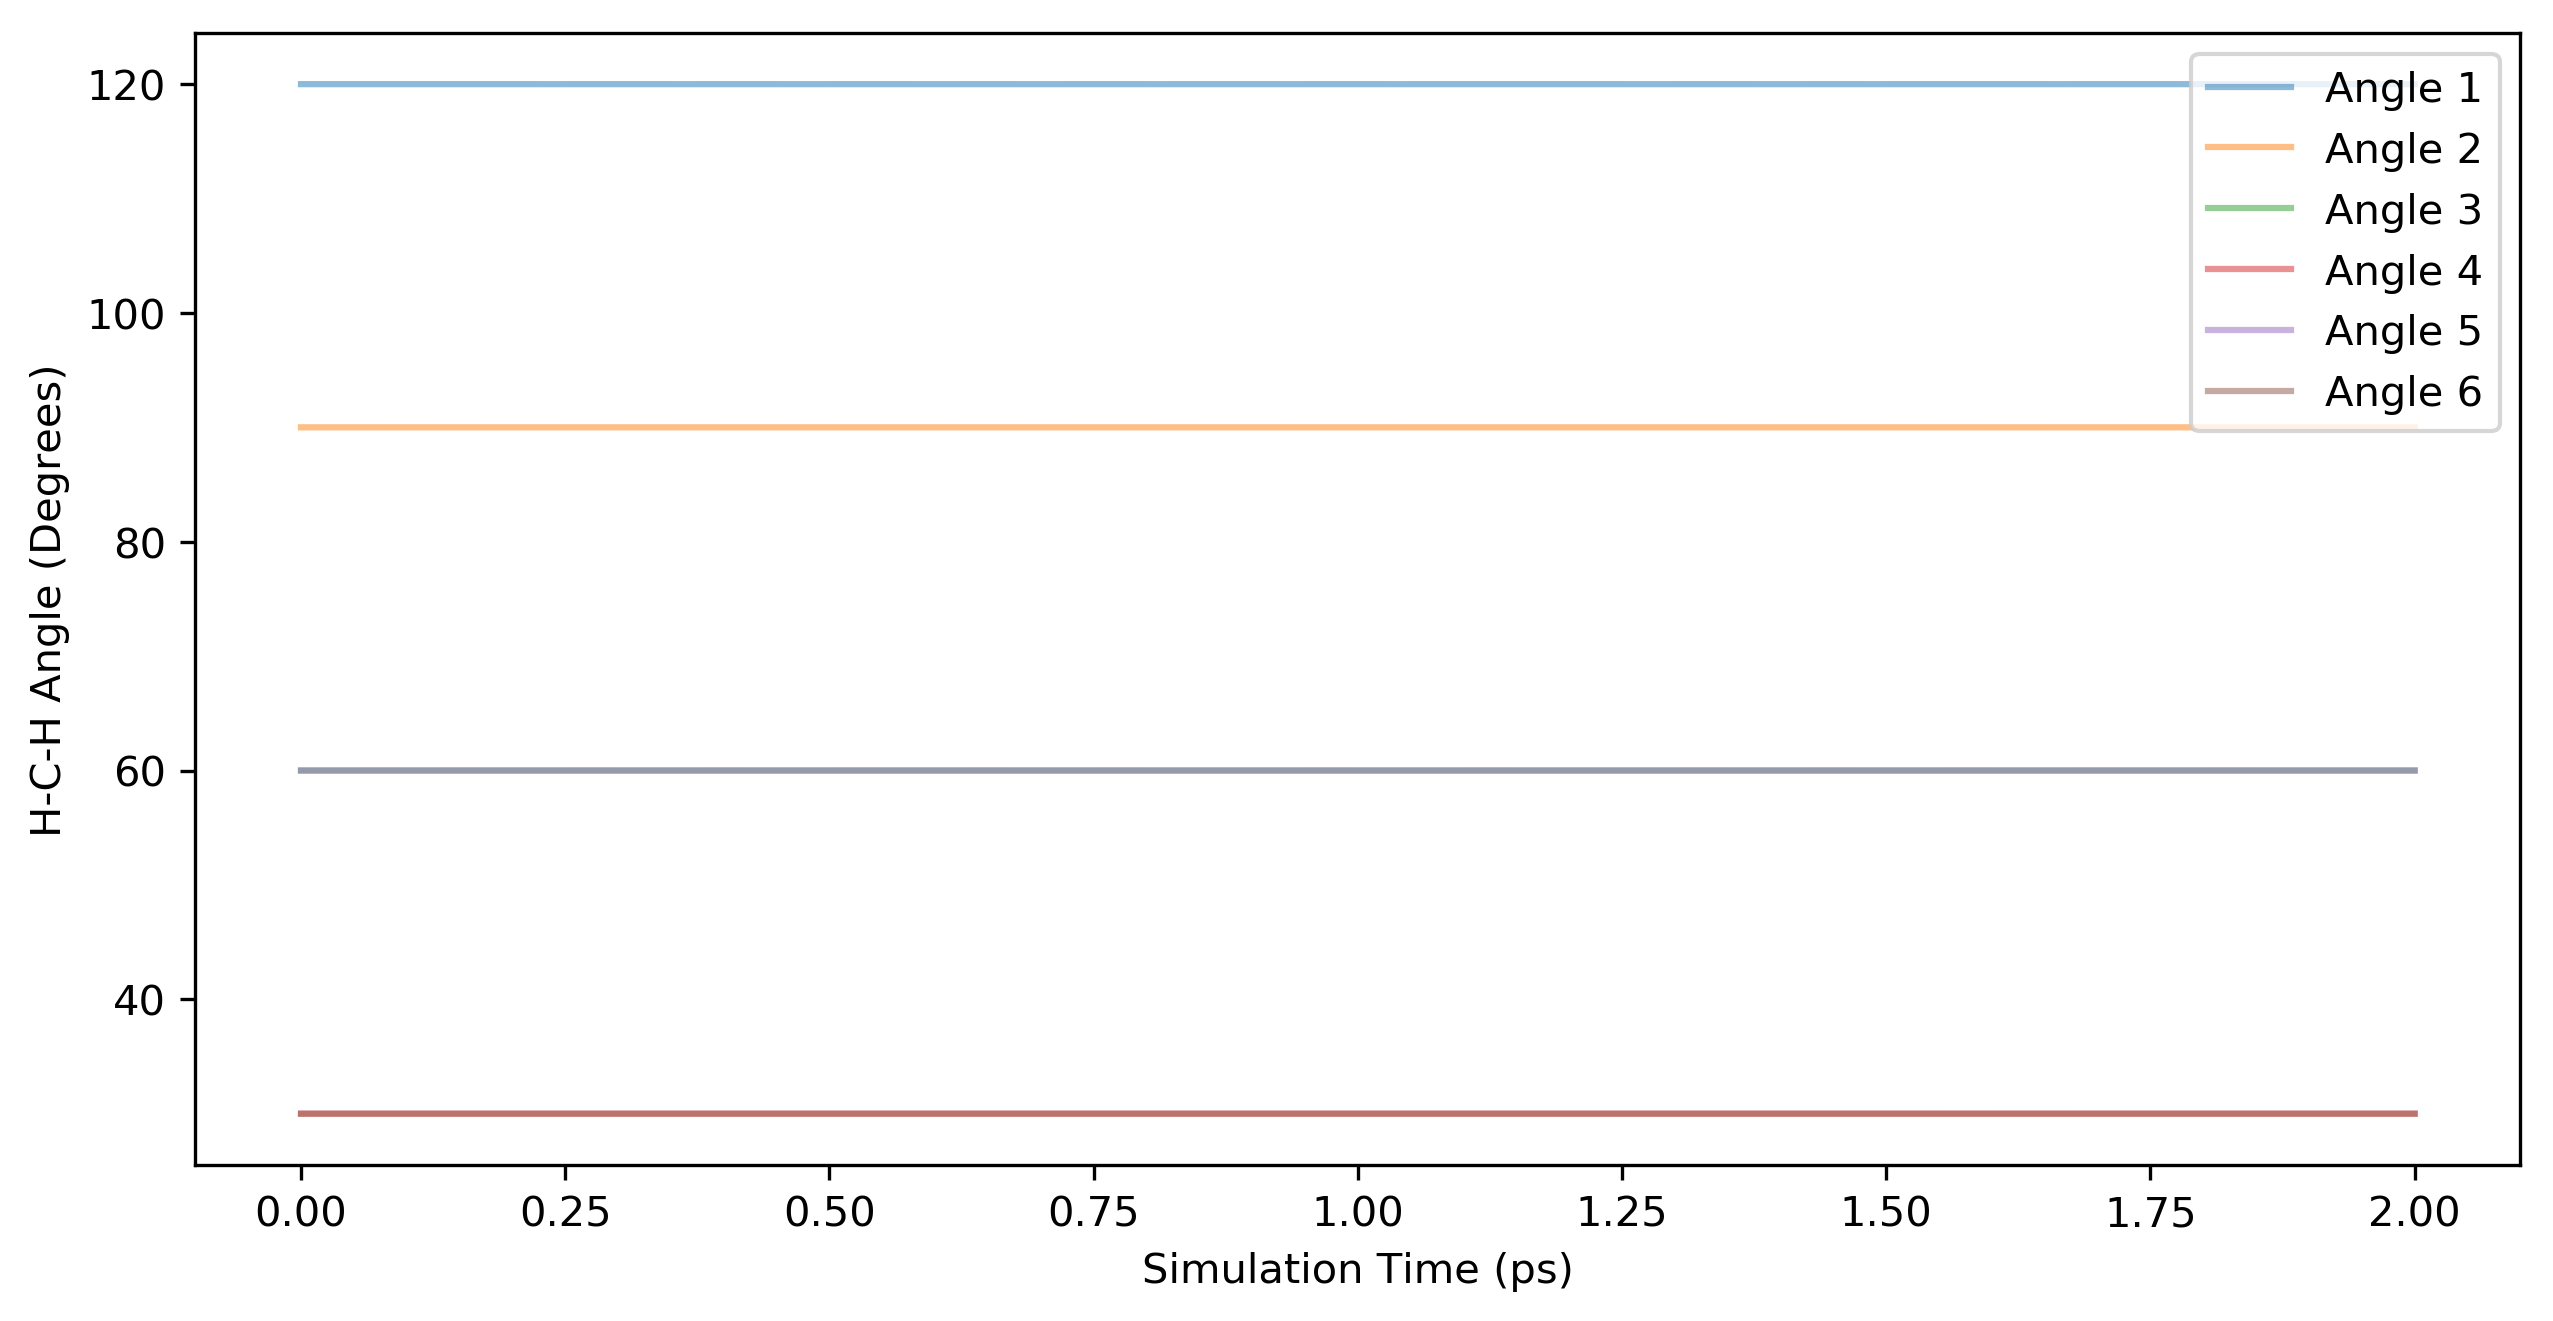

In [21]:
fig = plt.figure(figsize=(10,5),dpi=300)
plt.plot(CHHang[:,0]/1000,57.2958*CHHang[:,1],label="Angle 1",alpha=0.5)
plt.plot(CHHang[:,0]/1000,57.2958*CHHang[:,2],label="Angle 2",alpha=0.5)
plt.plot(CHHang[:,0]/1000,57.2958*CHHang[:,3],label="Angle 3",alpha=0.5)
plt.plot(CHHang[:,0]/1000,57.2958*CHHang[:,4],label="Angle 4",alpha=0.5)
plt.plot(CHHang[:,0]/1000,57.2958*CHHang[:,5],label="Angle 5",alpha=0.5)
plt.plot(CHHang[:,0]/1000,57.2958*CHHang[:,6],label="Angle 6",alpha=0.5)

#plt.hlines(57.2958*eqangl,0,(CHHang[:,0]/1000).max(),linestyle='--',zorder=100)

plt.legend()

plt.xlabel("Simulation Time (ps)")
plt.ylabel(r"H-C-H Angle (Degrees)")
plt.show()

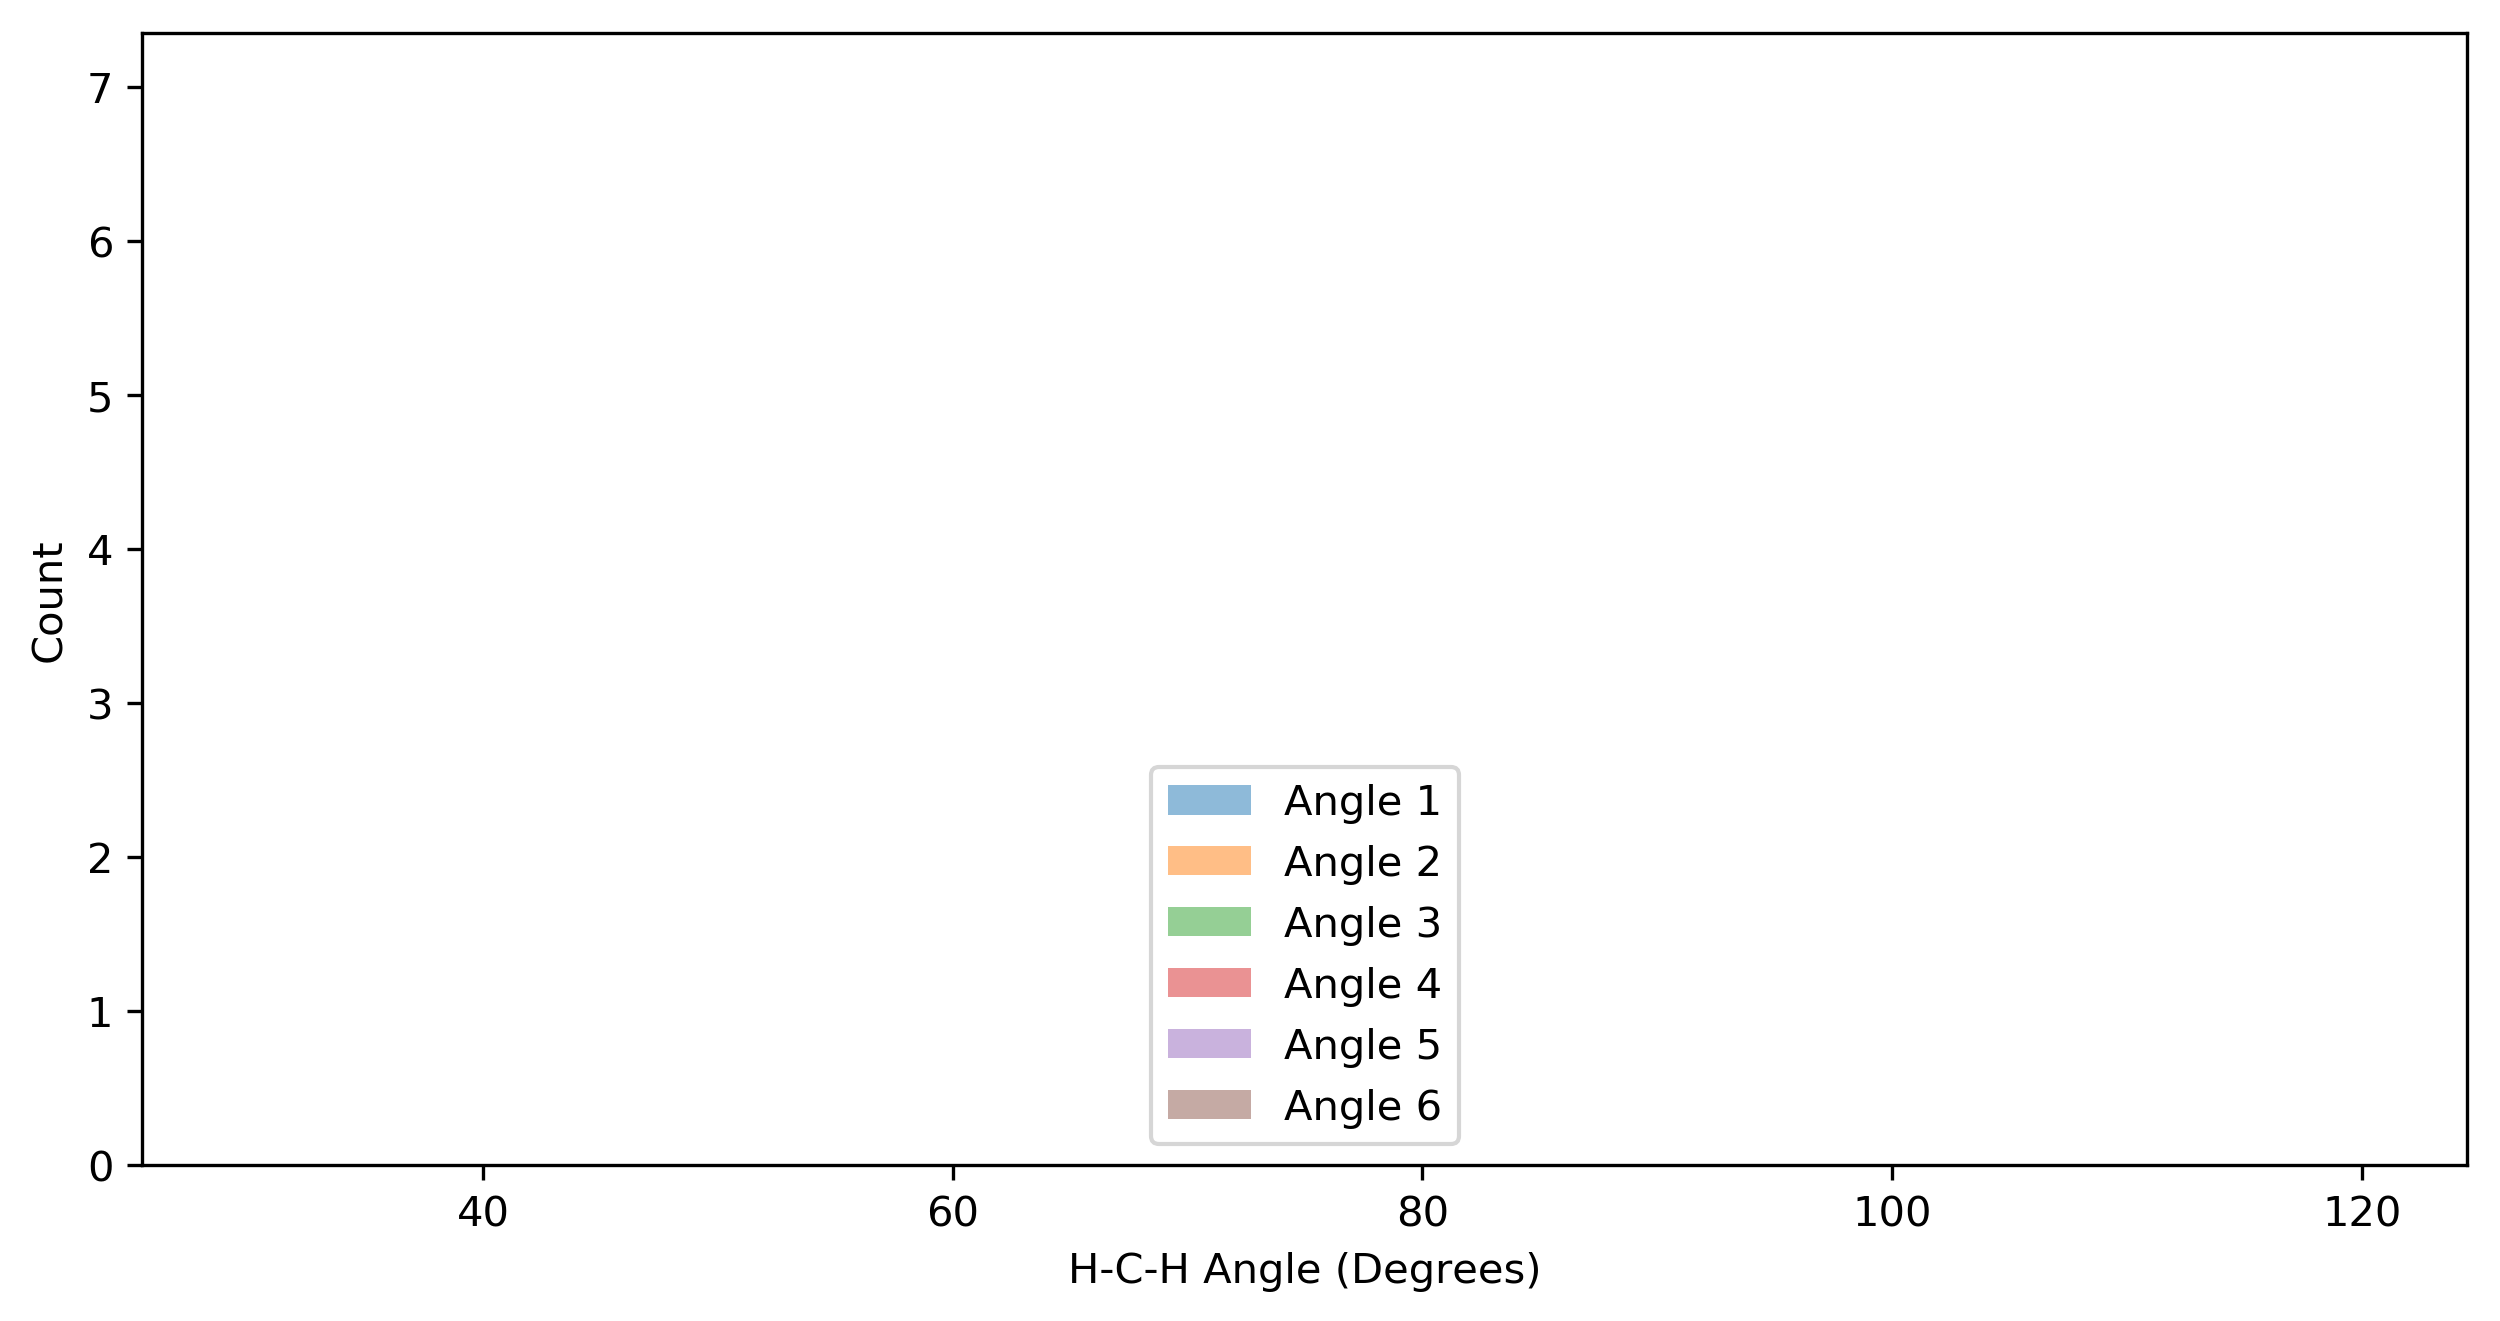

In [22]:
fig = plt.figure(figsize=(10,5),dpi=300)
plt.hist(57.2958*CHHang[:,1],bins=50,label="Angle 1",alpha=0.5)
plt.hist(57.2958*CHHang[:,2],bins=50,label="Angle 2",alpha=0.5)
plt.hist(57.2958*CHHang[:,3],bins=50,label="Angle 3",alpha=0.5)
plt.hist(57.2958*CHHang[:,4],bins=50,label="Angle 4",alpha=0.5)
plt.hist(57.2958*CHHang[:,5],bins=50,label="Angle 5",alpha=0.5)
plt.hist(57.2958*CHHang[:,6],bins=50,label="Angle 6",alpha=0.5)


#plt.vlines(57.2958*eqangl,0,670,linestyle='--',zorder=100)

plt.legend()

plt.ylabel("Count")
plt.xlabel(r"H-C-H Angle (Degrees)")
plt.show()

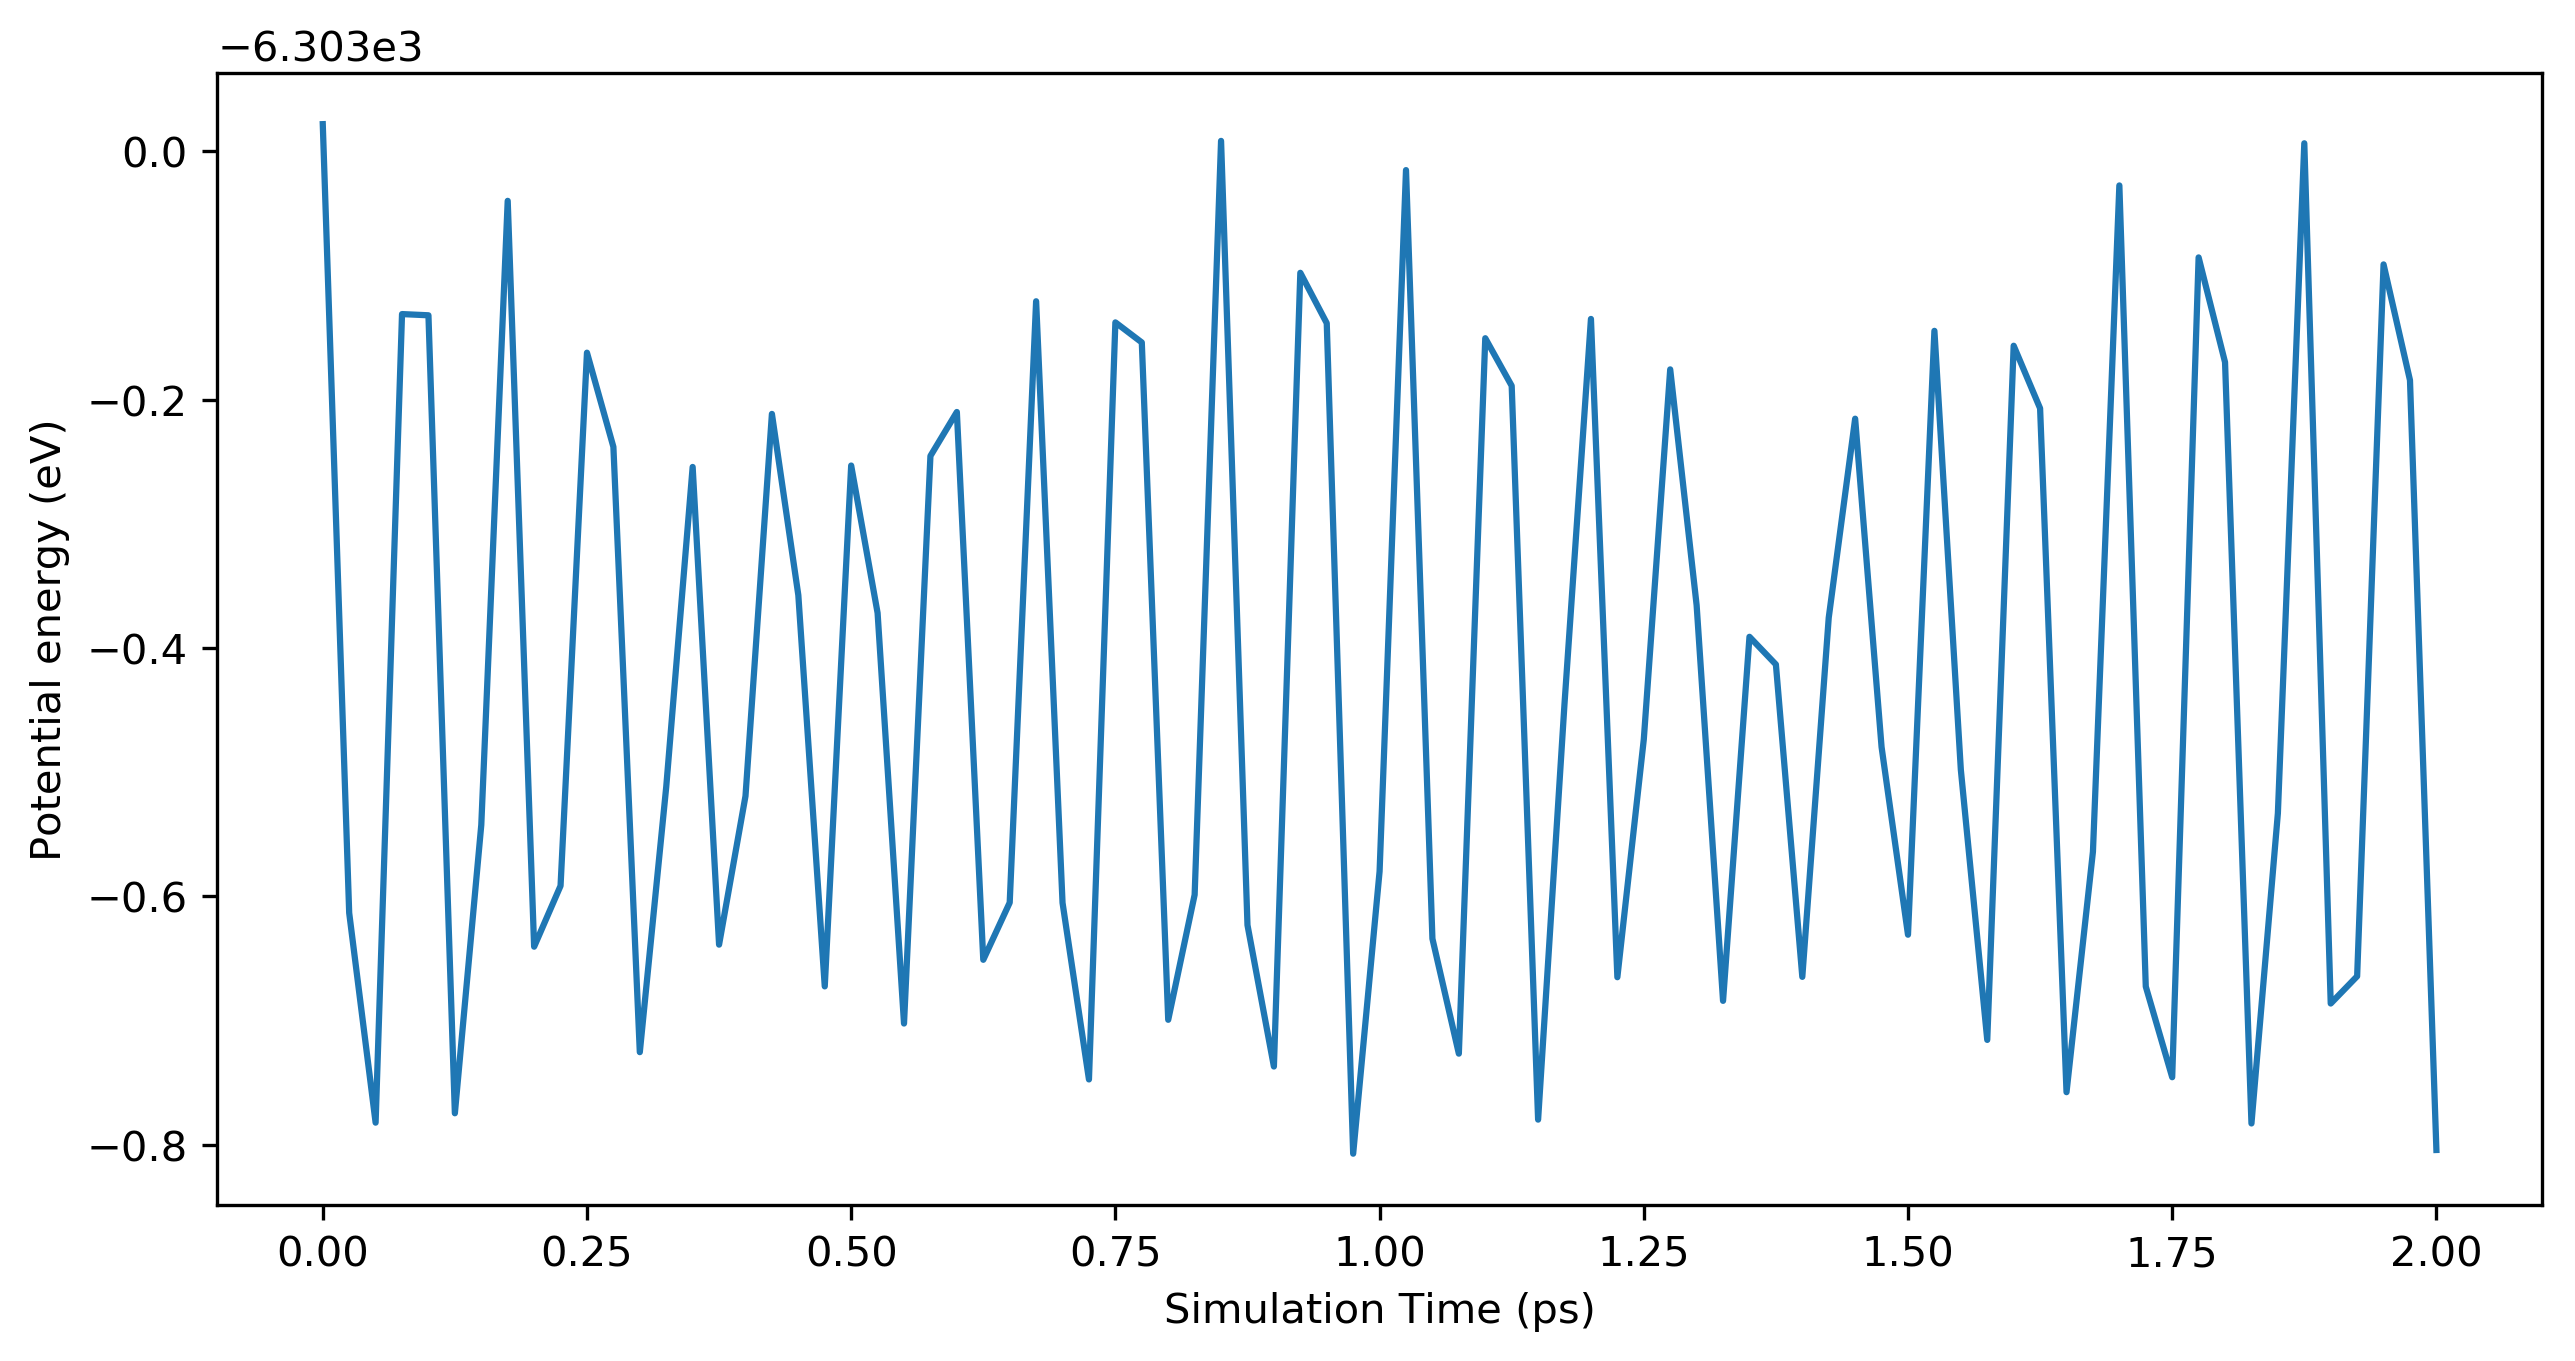

In [23]:
fig = plt.figure(figsize=(10,5),dpi=300)
plt.plot(energy[:,0]/1000,energy[:,1])
#plt.hlines(energy,0,(energy[:,0]/1000).max(),linestyle='--',zorder=100)

plt.xlabel("Simulation Time (ps)")
plt.ylabel(r"Potential energy (eV)")
plt.show()

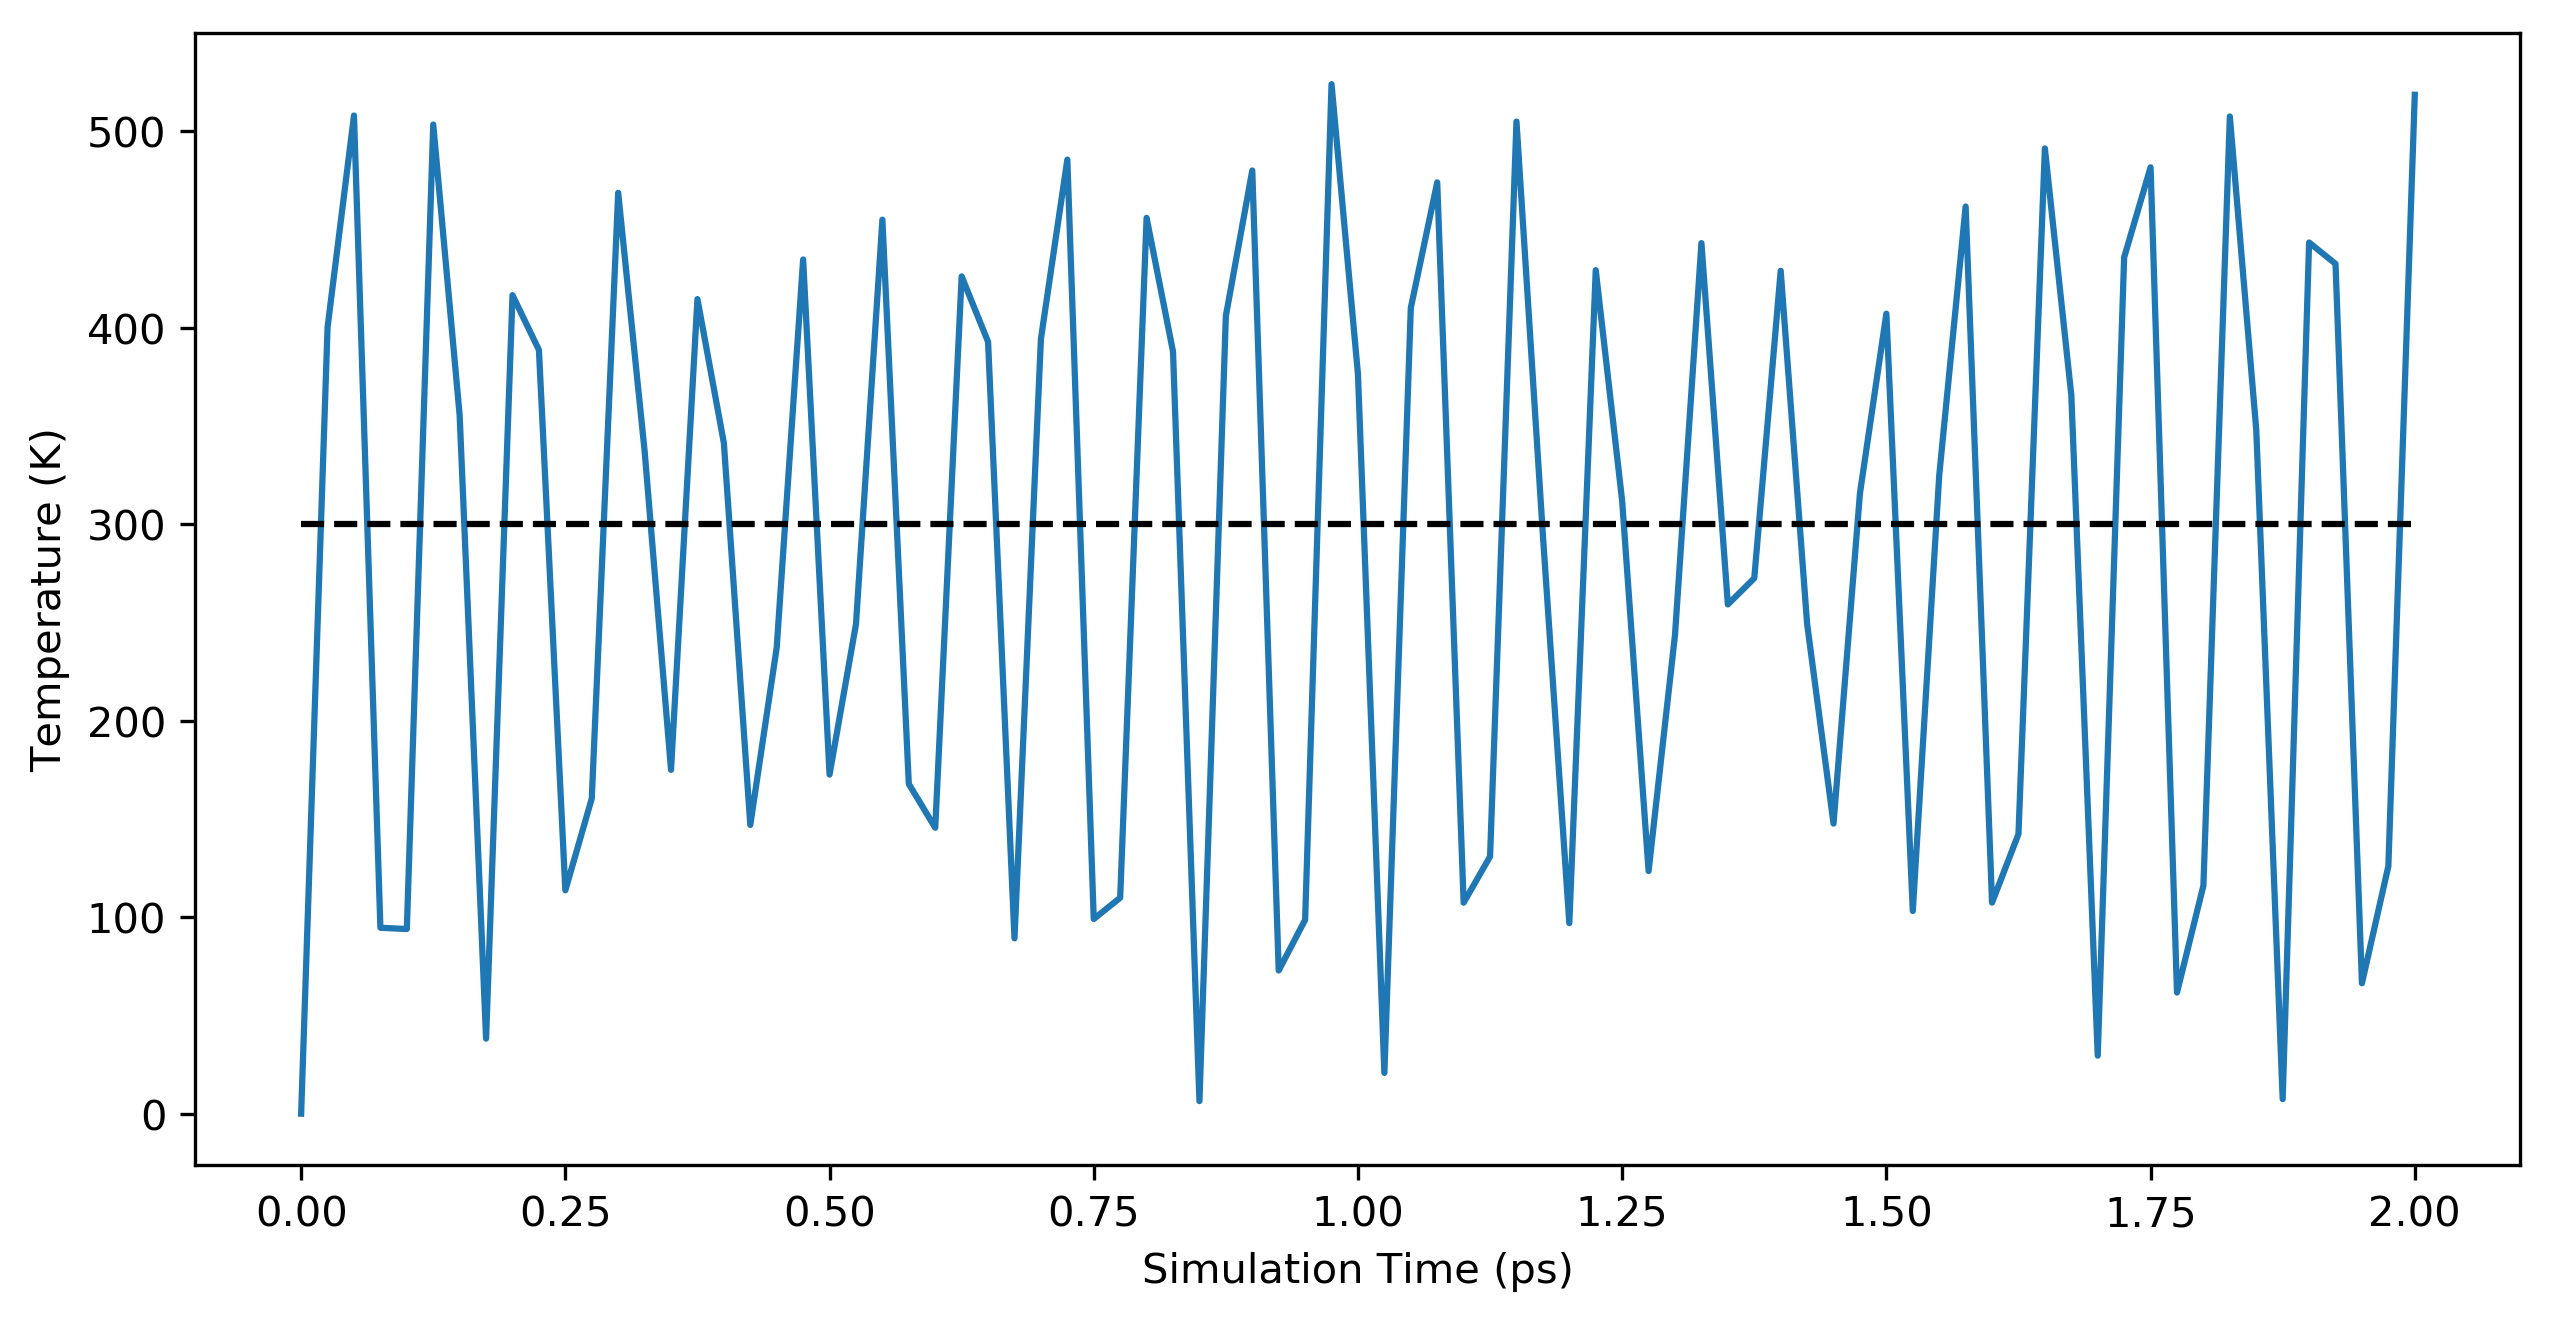

In [24]:
fig = plt.figure(figsize=(10,5),dpi=300)
plt.plot(temper[:,0]/1000,temper[:,1])
plt.hlines(300.0,0,(temper[:,0]/1000).max(),linestyle='--',zorder=100)

plt.xlabel("Simulation Time (ps)")
plt.ylabel(r"Temperature (K)")
plt.show()

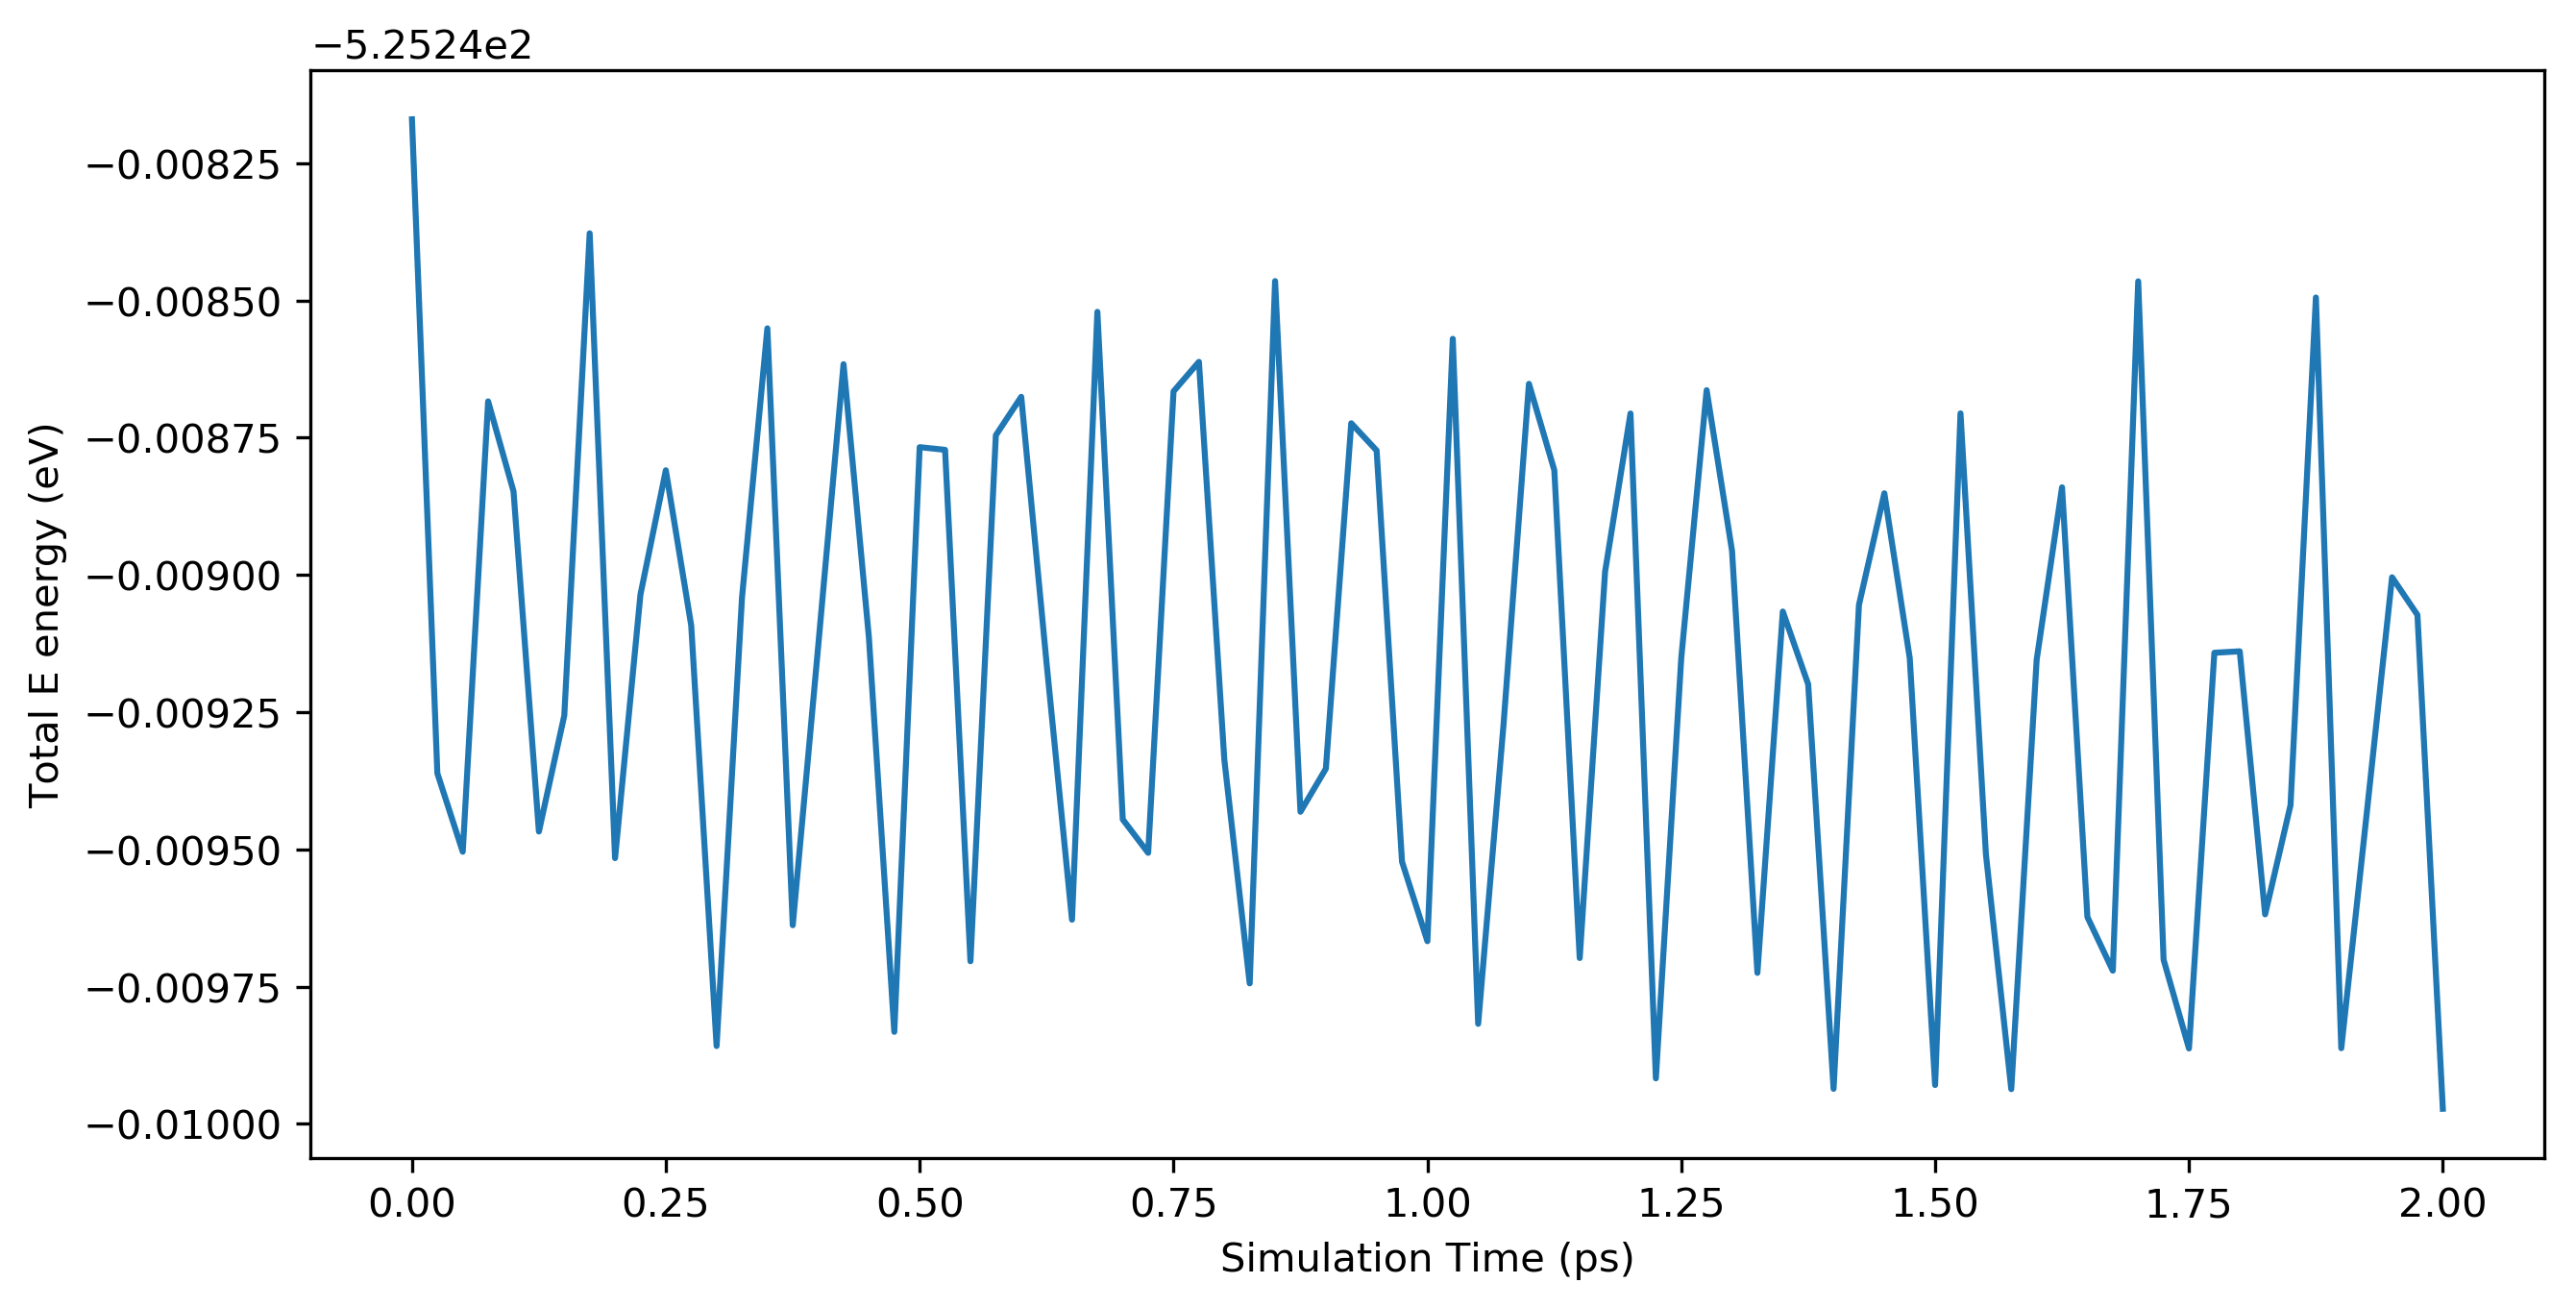

In [25]:
fig = plt.figure(figsize=(10,5),dpi=300)
plt.plot(toteng[:,0]/1000,toteng[:,1])
#plt.hlines(toteng,0,(toteng[:,0]/1000).max(),linestyle='--',zorder=100)

plt.xlabel("Simulation Time (ps)")
plt.ylabel(r"Total E energy (eV)")
plt.show()